# Kmeans Cluster Algorithm to find the cluster value and group the drivers in the given dataset. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('driver-data.csv')

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [5]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
data=df.drop('id',axis=1)

In [40]:
data.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [8]:
from sklearn.cluster import KMeans

In [9]:
k=KMeans(n_clusters=2)
lab=k.fit_predict(data)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
df['clusters']=k.labels_

In [11]:
k.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


<Axes: ylabel='Count'>

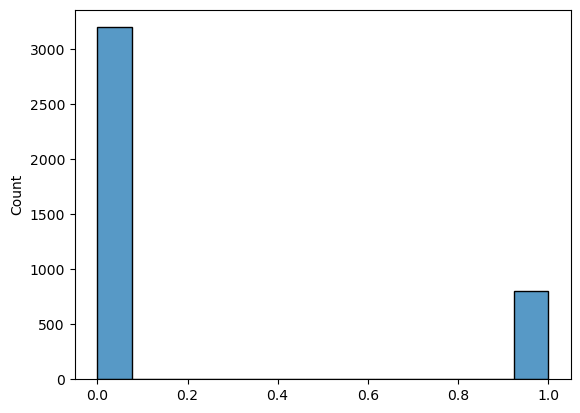

In [13]:
sns.histplot(lab) 

In [14]:
df['clusters'].value_counts()

0    3200
1     800
Name: clusters, dtype: int64

In [15]:
k.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

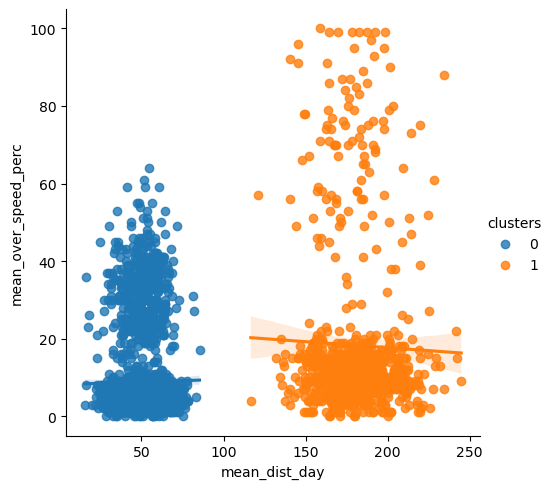

In [16]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=df,hue='clusters')

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


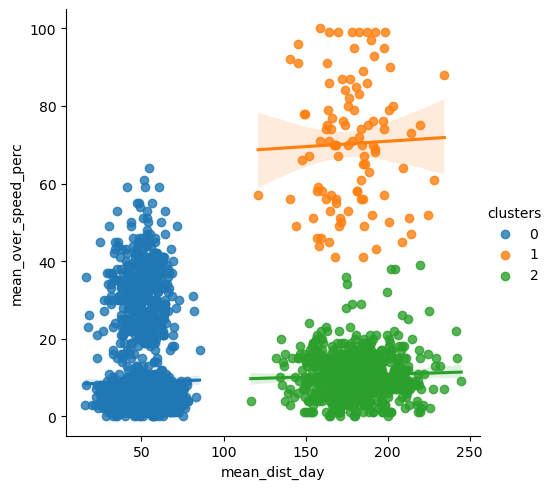

In [17]:
k=KMeans(n_clusters=3)
k.fit_predict(data)
df['clusters']=k.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=df,hue='clusters')

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


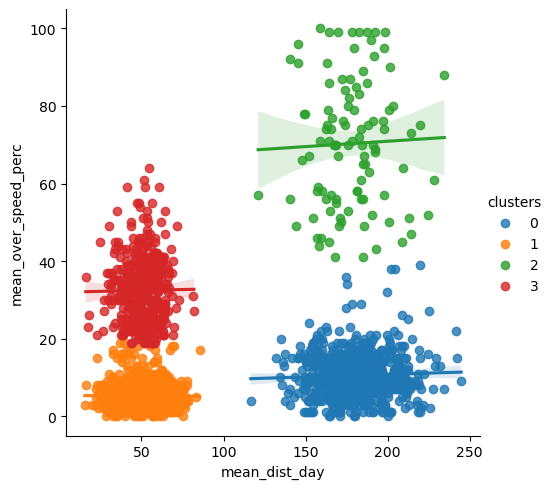

In [18]:
k=KMeans(n_clusters=4)
k.fit_predict(data)
df['clusters']=k.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=df,hue='clusters')

In [19]:
k.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


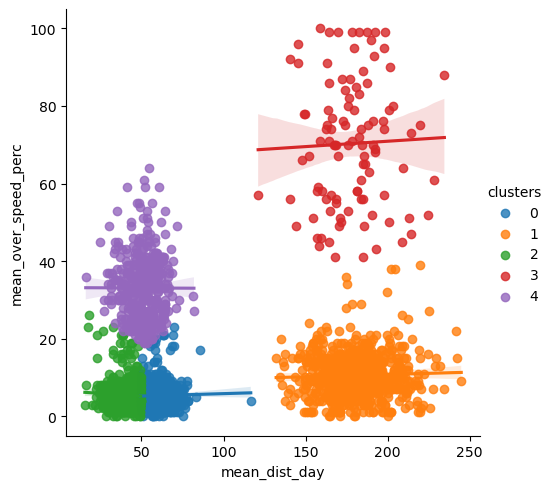

In [20]:
k=KMeans(n_clusters=5)
k.fit_predict(data)
df['clusters']=k.labels_
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=df,hue='clusters')

In [21]:
k.cluster_centers_

array([[ 57.69471342,   5.29062711],
       [180.43486331,  10.5294964 ],
       [ 41.30054753,   5.38859316],
       [177.83509615,  70.28846154],
       [ 50.61421836,  33.06203474]])

<Axes: ylabel='Count'>

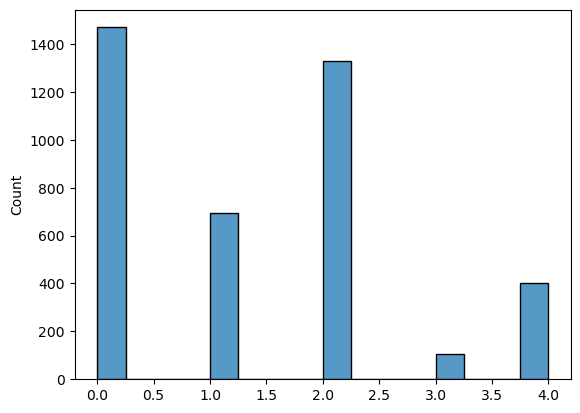

In [22]:
sns.histplot(k.labels_)

<Axes: xlabel='clusters', ylabel='Count'>

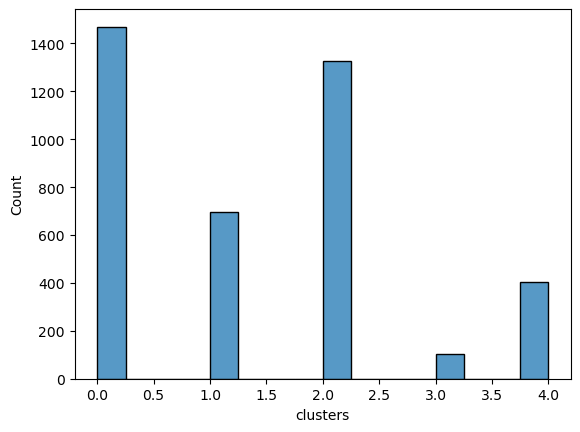

In [23]:
sns.histplot(df['clusters'])

In [24]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [25]:
import warnings
warnings.filterwarnings('ignore')

## Finding value of K

In [62]:
wss=[]          #Elbow method intra cluster distance
for i in range (1,11):
    k=KMeans(n_clusters=i,random_state=1)
    k.fit_predict(data)
    wss.append(k.inertia_)

In [60]:
k.inertia_

230421.39651097317

In [27]:
wss

[12184626.129627984,
 1316420.8509477184,
 992634.0606702471,
 719601.1096991899,
 534657.9839435453,
 372837.86302033614,
 319748.1023106628,
 276936.24498565786,
 252830.1687269559,
 230421.3965109732]

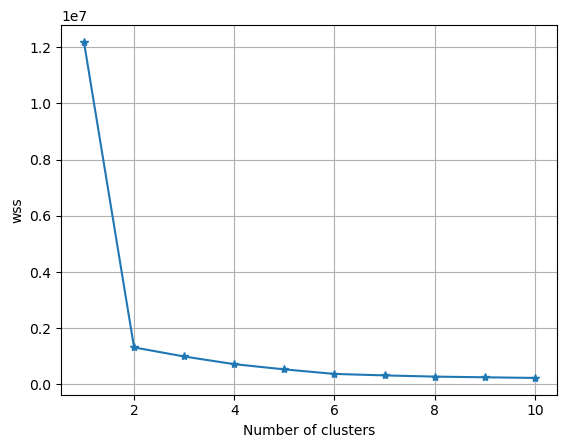

In [37]:
plt.plot(range(1,11),wss, '*-')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.grid()
# Value of cluster is 2 from elbow method

## K value from Silhoutte Method

In [38]:
from sklearn.metrics import silhouette_score

In [57]:
# Silhoutte method for intra and inter distance
for i in range(2,10):
    k=KMeans(n_clusters=i,random_state=1)
    m=k.fit_predict(data)
    SC=silhouette_score(data,m)
    print('silhoute score for',i,':',SC)

silhoute score for 2 : 0.8490223286225532
silhoute score for 3 : 0.8231396834167266
silhoute score for 4 : 0.5907475009381601
silhoute score for 5 : 0.5128249233219331
silhoute score for 6 : 0.4856090621775911
silhoute score for 7 : 0.45894991458826573
silhoute score for 8 : 0.45144078206268456
silhoute score for 9 : 0.44363680957878915


## better value is 2